# Imports

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from numpy import random
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import metrics

# Gather Data

In [2]:
#Season Stats
df_season_results = pd.read_csv("Data/2021/MDataFiles_Stage2/MRegularSeasonDetailedResults.csv")
df_teams = pd.read_csv("Data/2021/MDataFiles_Stage2/MTeams.csv")
df_teamSpellings = pd.read_csv("Data/2021/MDataFiles_Stage2/MTeamSpellings.csv", sep='\,', engine='python')

#KenPom
df_kenPom_2016 = pd.read_csv("Data/2021/kenPom_2016.csv")
df_kenPom_2017 = pd.read_csv("Data/2021/kenPom_2017.csv")
df_kenPom_2018 = pd.read_csv("Data/2021/kenPom_2018.csv")
df_kenPom_2019 = pd.read_csv("Data/2021/kenPom_2019.csv")
df_kenPom_2020 = pd.read_csv("Data/2021/kenPom_2020.csv")
df_kenPom_2021 = pd.read_csv("Data/2021/kenPom.csv")

ken_poms = [df_kenPom_2016, df_kenPom_2017, df_kenPom_2018, df_kenPom_2019, df_kenPom_2020, df_kenPom_2021]


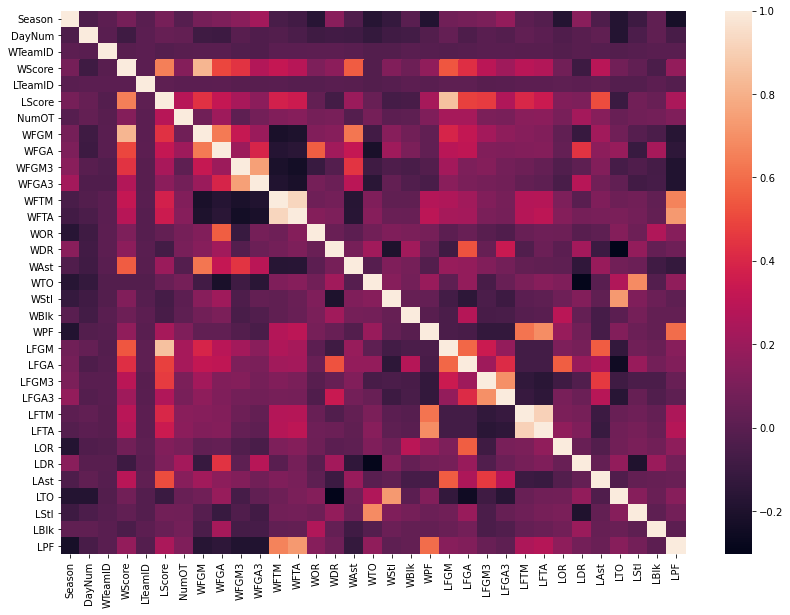

In [3]:
plt.figure(figsize=(14,10))
sns.heatmap(df_season_results.corr())

In [4]:
df_kenPom_2021

,Rk,TeamName_Clean,AdjEM,AdjO,AdjD,AdjT,Luck,SOS_AdjEM,SOS_OppO,SOS_OppD,NCSOS_AdjEM
0,1,Gonzaga,36.59,126.0,89.4,74.7,0.018,7.93,105.9,98.0,6.34
1,2,Illinois,30.70,118.8,88.1,70.6,0.026,18.27,112.4,94.1,9.99
2,3,Michigan,30.50,119.3,88.8,66.8,0.026,16.75,111.3,94.6,2.73
3,4,Baylor,29.93,123.0,93.0,68.7,0.047,9.64,106.3,96.7,-3.71
4,5,Houston,29.68,119.6,89.9,65.0,-0.011,6.82,103.9,97.1,1.99
...,...,...,...,...,...,...,...,...,...,...,...
352,353,South Carolina St.,-25.02,87.1,112.1,71.9,-0.109,-4.54,98.2,102.7,2.12
353,354,Alabama St.,-26.12,84.2,110.3,71.0,-0.049,-14.86,91.2,106.1,-99.00
354,355,Maryland Eastern Shore,-27.33,83.9,111.3,68.0,0.000,-99.00,0.0,200.0,-99.00
355,356,Chicago St.,-29.52,88.3,117.8,67.7,-0.006,9.28,106.8,97.6,9.28


# Clean Data

In [5]:
for x in range(len(ken_poms)):
    ken_poms[x]["TeamName_Clean"] = ken_poms[x]["TeamName_Clean"].str.lower()
    ken_poms[x]["TeamName_Clean"] = ken_poms[x]["TeamName_Clean"].str.strip()
    

#### 2020 Season Formatting

In [6]:
df_kenPom_2020 = pd.read_csv("Data/2021/kenPom_2020.csv")
df_kenPom_2020["TeamName_Clean"] = df_kenPom_2020["TeamName_Clean"].str.lower()
df_kenPom_2020["TeamName_Clean"] = df_kenPom_2020["TeamName_Clean"].str.strip('*123456789')
df_kenPom_2020["TeamName_Clean"] = df_kenPom_2020["TeamName_Clean"].str.strip()

df_kenPom_2020

,Rk,TeamName_Clean,AdjEM,AdjO,AdjD,AdjT,Luck,SOS_AdjEM,SOS_OppO,SOS_OppD,NCSOS_AdjEM,Year
0,1,kansas,30.23,115.8,85.5,67.3,0.040,12.66,107.4,94.7,9.58,2020
1,2,gonzaga,26.95,121.3,94.4,71.9,0.050,2.42,103.5,101.0,-2.09,2020
2,3,baylor,25.49,113.5,88.1,66.2,0.016,10.20,106.4,96.2,1.38,2020
3,4,dayton,24.93,119.1,94.1,67.6,0.002,2.74,104.1,101.3,-0.74,2020
4,5,duke,24.62,115.7,91.1,72.0,-0.009,7.28,106.0,98.7,2.60,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
348,349,maryland eastern shore,-26.14,81.7,107.8,67.5,-0.024,-6.40,97.6,104.1,7.78,2020
349,350,howard,-26.15,93.6,119.7,70.2,-0.015,-8.29,96.7,105.0,0.96,2020
350,351,mississippi valley st.,-27.87,89.8,117.6,77.1,-0.027,-6.01,97.8,103.9,5.14,2020
351,352,kennesaw st.,-28.71,83.5,112.2,68.2,-0.042,-1.74,102.0,103.7,4.10,2020


In [7]:
def kenPom_Clean(df):
    kp_df = pd.merge(df, df_teamSpellings, left_on=['TeamName_Clean'], right_on = ['TeamNameSpelling'], how = 'left')
    kp_df = kp_df.drop(['TeamNameSpelling'], axis=1)
    kp_df.dropna(axis=0, how='any', inplace=True)
    
    return kp_df

In [8]:
ken_poms = [df_kenPom_2016, df_kenPom_2017, df_kenPom_2018, df_kenPom_2019, df_kenPom_2020, df_kenPom_2021]

kp_df_2016 = kenPom_Clean(df_kenPom_2016)
kp_df_2017 = kenPom_Clean(df_kenPom_2017)
kp_df_2018 = kenPom_Clean(df_kenPom_2018)
kp_df_2019 = kenPom_Clean(df_kenPom_2019)
kp_df_2020 = kenPom_Clean(df_kenPom_2020)
kp_df_2021 = kenPom_Clean(df_kenPom_2021)

In [9]:
def get_season(df, year):
    df = df_season_results.loc[df_season_results.Season == year].reset_index(drop=True)
    return df
    

In [10]:
df_2016 = get_season('df_2016', 2016)
df_2017 = get_season('df_2017', 2017)
df_2018 = get_season('df_2018', 2018)
df_2019 = get_season('df_2019', 2019)
df_2020 = get_season('df_2020', 2020)
df_2021 = get_season('df_2021', 2021)

In [11]:
def merge_kp(df, kp_df):
    df = pd.merge(df, kp_df, left_on=['WTeamID'], right_on=['TeamID'], how='left', validate='m:1')
    df.dropna(axis=0, how='any', inplace=True)
    df['Winning_Team'] = df['TeamName_Clean']
    
    cols = ['WTeamID', 'Winning_Team', 'WScore', 'AdjEM', 'AdjO', 'AdjD', 'AdjT', 'Luck',
         'SOS_AdjEM','SOS_OppO', 'SOS_OppD', 'NCSOS_AdjEM', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 
         'WFTM', 'WFTA', 'WOR', 'WDR','WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LTeamID', 
         'LScore', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA','LOR', 'LDR', 'LAst', 'LTO', 
         'LStl', 'LBlk', 'LPF']
    df = df[cols]
    
    df = pd.merge(df, kp_df, left_on=['LTeamID'], right_on=['TeamID'], how='left', validate='m:1')
    df.dropna(axis=0, how='any', inplace=True)
    df['Losing_Team'] = df['TeamName_Clean']
    
    cols = ['WTeamID', 'Winning_Team', 'WScore', 'AdjEM_x', 'AdjO_x', 'AdjD_x','AdjT_x', 'Luck_x', 
         'SOS_AdjEM_x', 'SOS_OppO_x', 'SOS_OppD_x','NCSOS_AdjEM_x', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3',
         'WFTM', 'WFTA','WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 
         'LTeamID', 'Losing_Team', 'LScore','AdjEM_y','AdjO_y', 'AdjD_y', 'AdjT_y', 'Luck_y', 
         'SOS_AdjEM_y', 'SOS_OppO_y','SOS_OppD_y', 'NCSOS_AdjEM_y', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 
         'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst','LTO', 'LStl', 'LBlk', 'LPF']
    
    df = df[cols]
    
    return df

In [12]:
df_2016 = merge_kp(df_2016, kp_df_2016)
df_2017 = merge_kp(df_2017, kp_df_2017)
df_2018 = merge_kp(df_2018, kp_df_2018)
df_2019 = merge_kp(df_2019, kp_df_2019)
df_2020 = merge_kp(df_2020, kp_df_2020)
df_2021 = merge_kp(df_2021, kp_df_2021)


In [13]:
df_2021.head()

,WTeamID,Winning_Team,WScore,AdjEM_x,AdjO_x,AdjD_x,AdjT_x,Luck_x,SOS_AdjEM_x,SOS_OppO_x,SOS_OppD_x,NCSOS_AdjEM_x,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LTeamID,Losing_Team,LScore,AdjEM_y,AdjO_y,AdjD_y,AdjT_y,Luck_y,SOS_AdjEM_y,SOS_OppO_y,SOS_OppD_y,NCSOS_AdjEM_y,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,1101,abilene christian,70,10.39,103.3,92.9,69.9,-0.027,-7.74,97.8,105.6,4.68,20,49,13,23,17,27,6,24,14,15,8,3,0,1190,east tennessee st.,47,4.29,103.1,98.9,65.6,-0.063,3.91,104.9,101.0,4.78,15,51,3,21,14,17,11,27,5,22,6,2,0
1,1104,alabama,81,24.87,111.7,86.9,73.8,0.031,14.25,109.7,95.5,9.15,30,77,7,31,14,20,19,31,11,10,8,3,0,1240,jacksonville st.,57,0.70,105.0,104.3,66.1,0.017,-2.68,101.0,103.7,4.72,19,69,9,32,10,17,18,28,10,20,5,2,0
2,1111,appalachian st.,81,-4.39,98.4,102.8,65.7,0.039,-2.76,100.4,103.1,5.61,32,62,7,27,10,13,13,41,15,23,6,3,13,1354,south carolina st.,61,-25.02,87.1,112.1,71.9,-0.109,-4.54,98.2,102.7,2.12,24,80,7,32,6,11,12,18,12,9,13,0,14
3,1113,arizona st.,94,6.82,106.8,100.0,72.8,0.026,12.76,109.1,96.4,8.72,27,61,6,20,34,46,13,22,9,12,7,4,0,1348,rhode island,88,7.77,104.9,97.1,69.2,-0.109,9.61,106.6,97.0,10.83,29,56,9,18,21,35,7,26,14,16,8,2,0
4,1114,little rock,71,-6.72,98.3,105.0,67.2,-0.040,-2.90,99.6,102.5,3.86,22,51,4,17,23,29,16,16,7,19,13,4,0,1341,prairie view a&m,66,-6.84,94.4,101.2,69.4,0.111,-14.40,92.9,107.3,6.58,27,55,8,21,4,4,7,15,14,24,12,1,0


# Model Building

In [14]:
regress_df_2016 = df_2016.drop(['Winning_Team', 'Losing_Team', 'WTeamID', 'LTeamID', 'LScore', 'WFGM', 'WFGM3', 
                           'WFTM', 'LFGM', 'LFGM3', 'LFTM', ], axis=1)

regress_df_2017 = df_2017.drop(['Winning_Team', 'Losing_Team', 'WTeamID', 'LTeamID', 'LScore', 'WFGM', 'WFGM3', 
                           'WFTM', 'LFGM', 'LFGM3', 'LFTM', ], axis=1)

regress_df_2018 = df_2018.drop(['Winning_Team', 'Losing_Team', 'WTeamID', 'LTeamID', 'LScore', 'WFGM', 'WFGM3', 
                           'WFTM', 'LFGM', 'LFGM3', 'LFTM', ], axis=1)

regress_df_2019 = df_2019.drop(['Winning_Team', 'Losing_Team', 'WTeamID', 'LTeamID', 'LScore', 'WFGM', 'WFGM3', 
                           'WFTM', 'LFGM', 'LFGM3', 'LFTM', ], axis=1)

regress_df_2020 = df_2020.drop(['Winning_Team', 'Losing_Team', 'WTeamID', 'LTeamID', 'LScore', 'WFGM', 'WFGM3', 
                           'WFTM', 'LFGM', 'LFGM3', 'LFTM', ], axis=1)

regress_df_2021 = df_2021.drop(['Winning_Team', 'Losing_Team', 'WTeamID', 'LTeamID', 'LScore', 'WFGM', 'WFGM3', 
                           'WFTM', 'LFGM', 'LFGM3', 'LFTM', ], axis=1)

In [15]:
regress_df_2021.head()

,WScore,AdjEM_x,AdjO_x,AdjD_x,AdjT_x,Luck_x,SOS_AdjEM_x,SOS_OppO_x,SOS_OppD_x,NCSOS_AdjEM_x,WFGA,WFGA3,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,AdjEM_y,AdjO_y,AdjD_y,AdjT_y,Luck_y,SOS_AdjEM_y,SOS_OppO_y,SOS_OppD_y,NCSOS_AdjEM_y,LFGA,LFGA3,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,70,10.39,103.3,92.9,69.9,-0.027,-7.74,97.8,105.6,4.68,49,23,27,6,24,14,15,8,3,0,4.29,103.1,98.9,65.6,-0.063,3.91,104.9,101.0,4.78,51,21,17,11,27,5,22,6,2,0
1,81,24.87,111.7,86.9,73.8,0.031,14.25,109.7,95.5,9.15,77,31,20,19,31,11,10,8,3,0,0.70,105.0,104.3,66.1,0.017,-2.68,101.0,103.7,4.72,69,32,17,18,28,10,20,5,2,0
2,81,-4.39,98.4,102.8,65.7,0.039,-2.76,100.4,103.1,5.61,62,27,13,13,41,15,23,6,3,13,-25.02,87.1,112.1,71.9,-0.109,-4.54,98.2,102.7,2.12,80,32,11,12,18,12,9,13,0,14
3,94,6.82,106.8,100.0,72.8,0.026,12.76,109.1,96.4,8.72,61,20,46,13,22,9,12,7,4,0,7.77,104.9,97.1,69.2,-0.109,9.61,106.6,97.0,10.83,56,18,35,7,26,14,16,8,2,0
4,71,-6.72,98.3,105.0,67.2,-0.040,-2.90,99.6,102.5,3.86,51,17,29,16,16,7,19,13,4,0,-6.84,94.4,101.2,69.4,0.111,-14.40,92.9,107.3,6.58,55,21,4,7,15,14,24,12,1,0


In [16]:
def in_sample_results(regression, y_train, in_preds):
    ev = metrics.explained_variance_score(y_train, in_preds)
    mae =metrics.mean_absolute_error(y_train, in_preds) 
    mse=metrics.mean_squared_error(y_train, in_preds) 
    r2=metrics.r2_score(y_train, in_preds)
    
    print(f'{regression}')
    print('----------------------------------------------')
    print('IN SAMPLE RESULTS')
    print('Explained Variance: ', ev)
    print('r2: ', r2)
    print('MAE: ', mae)
    print('MSE: ', mse)
    print('RMSE ', np.sqrt(mse))
    print('----------------------------------------------')

In [17]:
def out_sample_results(y_test, out_preds):
    ev = metrics.explained_variance_score(y_test, out_preds)
    mae =metrics.mean_absolute_error(y_test, out_preds) 
    mse=metrics.mean_squared_error(y_test, out_preds) 
    r2=metrics.r2_score(y_test, out_preds)
    
    print('----------------------------------------------')
    print('OUT SAMPLE RESULTS')
    print('Explained Variance: ', ev)
    print('r2: ', r2)
    print('MAE: ', mae)
    print('MSE: ', mse)
    print('RMSE ', np.sqrt(mse))
    print('----------------------------------------------')

# 2016 Model

In [18]:
# get pandas columns for prediction
target_2016 = regress_df_2016["WScore"]
features_2016 = regress_df_2016.drop(["WScore"], axis=1)

# convert to lists/arrays (MUST HAPPEN)
X_2016 = np.array(features_2016)
y_2016 = np.array(target_2016)

# train/test split
X_train_2016, X_test_2016, y_train_2016, y_test_2016 = train_test_split(X_2016, y_2016, test_size=0.2, random_state=123)

Gradient Boosting Regression
----------------------------------------------
IN SAMPLE RESULTS
Explained Variance:  0.8459211566617335
r2:  0.8459211566617335
MAE:  3.364249352001342
MSE:  18.077001337189124
RMSE  4.2517056973865355
----------------------------------------------


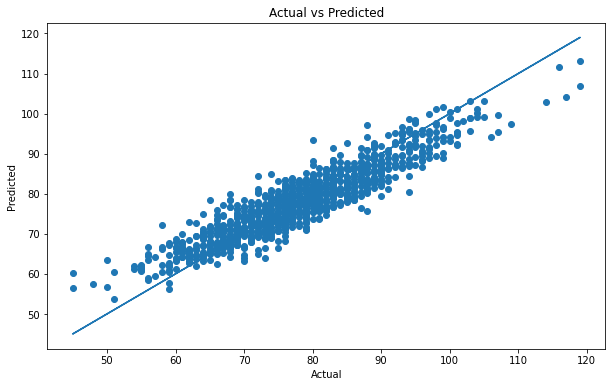

In [19]:
# train the model
gb_2016 = GradientBoostingRegressor()
gb_2016.fit(X_2016, y_2016)

#get predictions
in_sample_preds_2016 = gb_2016.predict(X_2016)
out_sample_preds_2016 = gb_2016.predict(X_test_2016)

#metric report
in_sample_results('Gradient Boosting Regression', y_2016, in_sample_preds_2016)
# out_sample_results(y_test_2016, out_sample_preds_2016)

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test_2016, out_sample_preds_2016)
plt.plot(y_test_2016, y_test_2016)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

In [20]:
filename = 'finalized_model_2016.sav'
pickle.dump(gb_2016, open(filename, 'wb'))

# 2017 Model

In [21]:
# get pandas columns for prediction
target_2017 = regress_df_2017["WScore"]
features_2017 = regress_df_2017.drop(["WScore"], axis=1)

# convert to lists/arrays (MUST HAPPEN)
X_2017 = np.array(features_2017)
y_2017 = np.array(target_2017)

# train/test split
X_train_2017, X_test_2017, y_train_2017, y_test_2017 = train_test_split(X_2017, y_2017, test_size=0.2, random_state=123)

Gradient Boosting Regression
----------------------------------------------
IN SAMPLE RESULTS
Explained Variance:  0.8550897912902938
r2:  0.8550897912902937
MAE:  3.335994560212446
MSE:  17.801517896864617
RMSE  4.219184506141515
----------------------------------------------


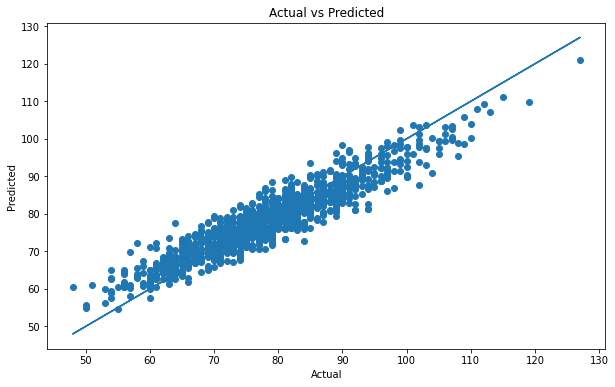

In [22]:
# train the model
gb_2017 = GradientBoostingRegressor()
gb_2017.fit(X_2017, y_2017)

#get predictions
in_sample_preds_2017 = gb_2017.predict(X_2017)
out_sample_preds_2017 = gb_2017.predict(X_test_2017)

#metric report
in_sample_results('Gradient Boosting Regression', y_2017, in_sample_preds_2017)
# out_sample_results(y_test_2017, out_sample_preds_2017)

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test_2017, out_sample_preds_2017)
plt.plot(y_test_2017, y_test_2017)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

In [23]:
filename = 'finalized_model_2017.sav'
pickle.dump(gb_2017, open(filename, 'wb'))

# 2018 Model

In [24]:
# get pandas columns for prediction
target_2018 = regress_df_2018["WScore"]
features_2018 = regress_df_2018.drop(["WScore"], axis=1)

# convert to lists/arrays (MUST HAPPEN)
X_2018 = np.array(features_2018)
y_2018 = np.array(target_2018)

# train/test split
X_train_2018, X_test_2018, y_train_2018, y_test_2018 = train_test_split(X_2018, y_2018, test_size=0.2, random_state=123)

Gradient Boosting Regression
----------------------------------------------
IN SAMPLE RESULTS
Explained Variance:  0.8503995704645109
r2:  0.8503995704645109
MAE:  3.3505074857230523
MSE:  17.84383786274826
RMSE  4.224196712127438
----------------------------------------------


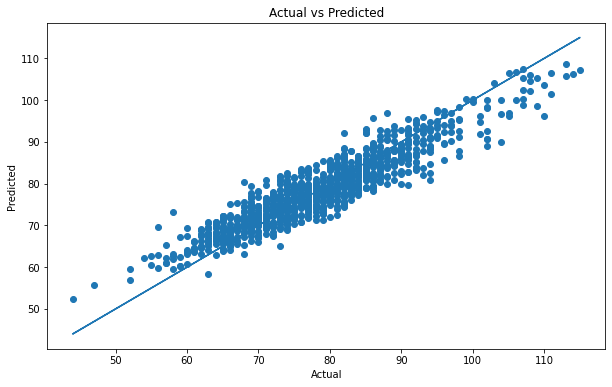

In [25]:
# train the model
gb_2018 = GradientBoostingRegressor()
gb_2018.fit(X_2018, y_2018)

#get predictions
in_sample_preds_2018 = gb_2018.predict(X_2018)
out_sample_preds_2018 = gb_2018.predict(X_test_2018)

#metric report
in_sample_results('Gradient Boosting Regression', y_2018, in_sample_preds_2018)
# out_sample_results(y_test_2018, out_sample_preds_2018)

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test_2018, out_sample_preds_2018)
plt.plot(y_test_2018, y_test_2018)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

In [26]:
filename = 'finalized_model_2018.sav'
pickle.dump(gb_2018, open(filename, 'wb'))

# 2019 Model

In [27]:
# get pandas columns for prediction
target_2019 = regress_df_2019["WScore"]
features_2019 = regress_df_2019.drop(["WScore"], axis=1)

# convert to lists/arrays (MUST HAPPEN)
X_2019 = np.array(features_2019)
y_2019 = np.array(target_2019)

# train/test split
X_train_2019, X_test_2019, y_train_2019, y_test_2019 = train_test_split(X_2019, y_2019, test_size=0.2, random_state=123)

Gradient Boosting Regression
----------------------------------------------
IN SAMPLE RESULTS
Explained Variance:  0.848817365576062
r2:  0.848817365576062
MAE:  3.3042650785400074
MSE:  17.286231996942462
RMSE  4.157671463324449
----------------------------------------------


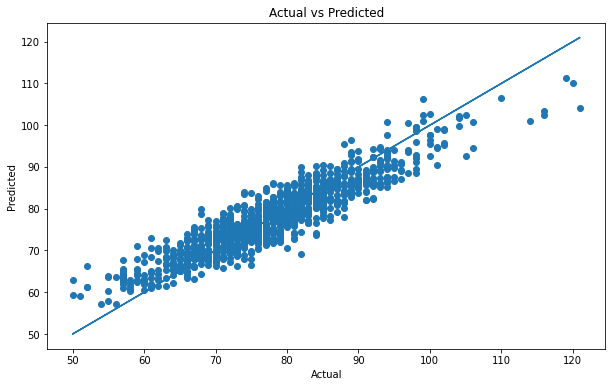

In [28]:
# train the model
gb_2019 = GradientBoostingRegressor()
gb_2019.fit(X_2019, y_2019)

#get predictions
in_sample_preds_2019 = gb_2019.predict(X_2019)
out_sample_preds_2019 = gb_2019.predict(X_test_2019)

#metric report
in_sample_results('Gradient Boosting Regression', y_2019, in_sample_preds_2019)
# out_sample_results(y_test_2019, out_sample_preds_2019)

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test_2019, out_sample_preds_2019)
plt.plot(y_test_2019, y_test_2019)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

In [29]:
filename = 'finalized_model_2019.sav'
pickle.dump(gb_2019, open(filename, 'wb'))

# 2020 Model

In [30]:
# get pandas columns for prediction
target_2020 = regress_df_2020["WScore"]
features_2020 = regress_df_2020.drop(["WScore"], axis=1)

# convert to lists/arrays (MUST HAPPEN)
X_2020 = np.array(features_2020)
y_2020 = np.array(target_2020)

# train/test split
X_train_2020, X_test_2020, y_train_2020, y_test_2020 = train_test_split(X_2020, y_2020, test_size=0.2, random_state=123)

Gradient Boosting Regression
----------------------------------------------
IN SAMPLE RESULTS
Explained Variance:  0.8393368072150943
r2:  0.8393368072150943
MAE:  3.345478639103275
MSE:  17.834374132746913
RMSE  4.223076382537606
----------------------------------------------


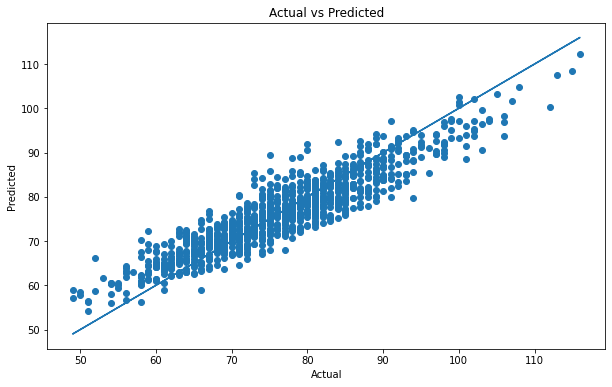

In [31]:
# train the model
gb_2020 = GradientBoostingRegressor()
gb_2020.fit(X_2020, y_2020)

#get predictions
in_sample_preds_2020 = gb_2020.predict(X_2020)
out_sample_preds_2020 = gb_2020.predict(X_test_2020)

#metric report
in_sample_results('Gradient Boosting Regression', y_2020, in_sample_preds_2020)
# out_sample_results(y_test_2020, out_sample_preds_2020)

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test_2020, out_sample_preds_2020)
plt.plot(y_test_2020, y_test_2020)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

In [32]:
filename = 'finalized_model_2020.sav'
pickle.dump(gb_2020, open(filename, 'wb'))

# 2021 Model

In [33]:
# get pandas columns for prediction
target_2021 = regress_df_2021["WScore"]
features_2021 = regress_df_2021.drop(["WScore"], axis=1)

# convert to lists/arrays (MUST HAPPEN)
X_2021 = np.array(features_2021)
y_2021 = np.array(target_2021)

# train/test split
X_train_2021, X_test_2021, y_train_2021, y_test_2021 = train_test_split(X_2021, y_2021, test_size=0.2, random_state=123)

Gradient Boosting Regression
----------------------------------------------
IN SAMPLE RESULTS
Explained Variance:  0.8207166322644546
r2:  0.8207166322644546
MAE:  3.545928599217002
MSE:  19.821873028937723
RMSE  4.4521762127006745
----------------------------------------------
----------------------------------------------
OUT SAMPLE RESULTS
Explained Variance:  0.8265604300997019
r2:  0.8259509419088964
MAE:  3.5263999631890632
MSE:  19.229000932856312
RMSE  4.3850884749177315
----------------------------------------------


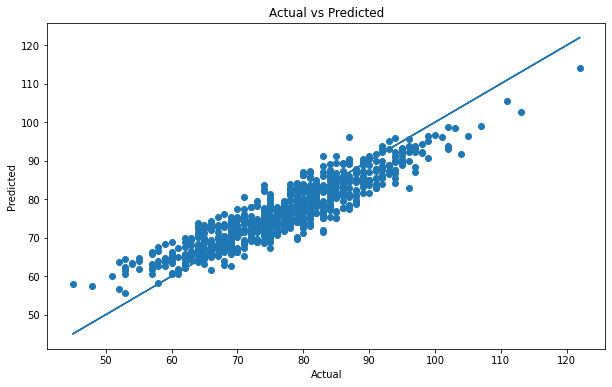

In [53]:
# train the model
gb_2021 = GradientBoostingRegressor()
gb_2021.fit(X_2021, y_2021)

#get predictions
in_sample_preds_2021 = gb_2021.predict(X_2021)
out_sample_preds_2021 = gb_2021.predict(X_test_2021)

#metric report
in_sample_results('Gradient Boosting Regression', y_2021, in_sample_preds_2021)
out_sample_results(y_test_2021, out_sample_preds_2021)

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test_2021, out_sample_preds_2021)
plt.plot(y_test_2021, y_test_2021)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

In [35]:
import pickle
 # save the model to disk
filename = 'finalized_model_2021.sav'
pickle.dump(gb_2021, open(filename, 'wb'))

# Averages for Single Game Inputs

In [36]:
def get_average(df):
    avg_df = df.groupby("Winning_Team").mean()
    avg_df['WTeamID'] = avg_df['WTeamID'].astype(int)
    return avg_df

In [37]:
avg_2016 = get_average(df_2016)
avg_2017 = get_average(df_2017)
avg_2018 = get_average(df_2018)
avg_2019 = get_average(df_2019)
avg_2020 = get_average(df_2020)
avg_2021 = get_average(df_2021)

In [38]:
def full_avg(kp_df, df, year):
    avg_df = pd.merge(kp_df, df, left_on='TeamID', right_on='WTeamID', how='left')
    avg_df.dropna(axis=0, how='any', inplace=True)
    
    avg_df.to_csv(f'Data/AllYears/full_avg_{year}.csv', index=False)
    
    return avg_df

In [39]:
full_avg_2016 = full_avg(kp_df_2016, avg_2016, 2016)
full_avg_2017 = full_avg(kp_df_2017, avg_2017, 2017)
full_avg_2018 = full_avg(kp_df_2018, avg_2018, 2018)
full_avg_2019 = full_avg(kp_df_2019, avg_2019, 2019)
full_avg_2020 = full_avg(kp_df_2020, avg_2020, 2020)
full_avg_2021 = full_avg(kp_df_2021, avg_2021, 2021)

In [40]:
avgs = ['full_avg_2016.csv', 'full_avg_2017.csv', 'full_avg_2018.csv','full_avg_2019.csv',
        'full_avg_2020.csv','full_avg_2021.csv']

csvs = []

for x in avgs:
    csvs.append(pd.read_csv(f'Data/AllYears/{x}'))
    
avgsAllYears = pd.concat(csvs).reset_index(drop=True)
avgsAllYears.to_csv('Data/AllYears/avgsAllYears.csv', index=False)
    

# Single Game Matchups

In [55]:
def get_matchup(yr1, yr2, avg_df_year, teamA, gb_year, avg_df_year2, teamB, gb_year2):
    home = avg_df_year.loc[avg_df_year['TeamName_Clean'] == teamA]
    home = home[['AdjEM', 'AdjO', 'AdjD', 'AdjT', 'Luck', 'SOS_AdjEM',
       'SOS_OppO', 'SOS_OppD', 'NCSOS_AdjEM', 'WFGA',
       'WFGA3', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk',
       'WPF']]
    
    away = avg_df_year2.loc[avg_df_year2['TeamName_Clean'] == teamB]
    away = away[['AdjEM', 'AdjO', 'AdjD', 'AdjT', 'Luck', 'SOS_AdjEM',
       'SOS_OppO', 'SOS_OppD', 'NCSOS_AdjEM', 'WFGA',
       'WFGA3', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk',
       'WPF']]
    
    home_points = pd.merge(home, away, how='outer')
    away_points = pd.merge(away, home, how='outer')
    
    home_points = np.array(home_points).reshape(-1, 38)
    away_points = np.array(away_points).reshape(-1, 38)
    
    home_score = int(gb_year.predict(home_points))
    away_score = int(gb_year2.predict(away_points))
    
    OT_count = 0
    
    while home_score == away_score:
        OT_count += 1
        print(f'END OF REGULATION | {teamA}: {round(home_score,0)} | {teamB}: {round(away_score,0)}')
        print('-----------------------------------------')
        print(f'SIMMING {OT_count}OT')
        print('-----------------------------------------')
        home_score = home_score + random.randint(5, 15)
        away_score = away_score + random.randint(5, 15)
    else:
        print('FINAL')
        print('-----------------------------------------')
#         return print(f'{yr1} {teamA}: {round(home_score,0)} | {yr2} {teamB}: {round(away_score,0)}')
        return {'team': teamA, 'points': home_score}, {'team': teamB, 'points': away_score}, {'overtime': OT_count}, print(f'{teamA}: {home_score} | {teamB}: {away_score}')

In [63]:
get_matchup(2021, 2021, full_avg_2021, 'arkansas', gb_2021, full_avg_2021, 'colgate', gb_2021)

END OF REGULATION | arkansas: 80 | colgate: 80
-----------------------------------------
SIMMING 1OT
-----------------------------------------
FINAL
-----------------------------------------
arkansas: 93 | colgate: 87


({'team': 'arkansas', 'points': 93},
 {'team': 'colgate', 'points': 87},
 {'overtime': 1},
 None)

# Bracket Simulation

#### First Round

In [64]:
tourney_teams_west =[['gonzaga', 'norfolk st.'], ['oklahoma', 'missouri'], ['creighton', 'uc santa barbara'], 
                     ['virginia', 'ohio'], ['usc', 'drake'],['kansas', 'eastern washington'], ['oregon', 'vcu'], 
                     ['iowa', 'grand canyon']]

tourney_teams_east = [['michigan', 'texas southern'], ['lsu', 'st. bonaventure'], ['colorado', 'georgetown'], 
                      ['florida st.', 'unc greensboro'],['byu', 'ucla'],['texas', 'abilene christian'], 
                      ['connecticut', 'maryland'], ['alabama', 'iona']]

tourney_teams_south = [['baylor', 'hartford'], ['north carolina', 'wisconsin'], ['villanova', 'winthrop'], 
                       ['purdue', 'north texas'],['texas tech', 'utah st.'], ['arkansas', 'colgate'], 
                       ['florida', 'virginia tech'],['ohio st.', 'oral roberts']]

tourney_teams_midwest = [['illinois', 'drexel'], ['loyola chicago', 'georgia tech'], ['tennessee', 'oregon st.'],
                        ['oklahoma st.', 'liberty'], ['san diego st.', 'syracuse'], ['west virginia', 'morehead st.'],
                        ['clemson', 'rutgers'], ['houston', 'cleveland st.']]

first_round = tourney_teams_west, tourney_teams_east, tourney_teams_south, tourney_teams_midwest

for x in first_round:
    for team in x:
        get_matchup(2021, 2021, full_avg_2021, team[0], gb_2021, full_avg_2021, team[1], gb_2021)
        print('-----------------------------------------')
    


FINAL
-----------------------------------------
gonzaga: 83 | norfolk st.: 77
-----------------------------------------
FINAL
-----------------------------------------
oklahoma: 77 | missouri: 73
-----------------------------------------
FINAL
-----------------------------------------
creighton: 78 | uc santa barbara: 71
-----------------------------------------
FINAL
-----------------------------------------
virginia: 70 | ohio: 77
-----------------------------------------
FINAL
-----------------------------------------
usc: 75 | drake: 69
-----------------------------------------
FINAL
-----------------------------------------
kansas: 71 | eastern washington: 74
-----------------------------------------
END OF REGULATION | oregon: 70 | vcu: 70
-----------------------------------------
SIMMING 1OT
-----------------------------------------
FINAL
-----------------------------------------
oregon: 76 | vcu: 75
-----------------------------------------
FINAL
-------------------------------

#### Second Round

In [44]:
tourney_2R_west = [['gonzaga', 'oklahoma'], ['creighton', 'ohio'], ['usc', 'eastern washington'], ['oregon', 'iowa']]

tourney_2R_east = [['michigan', 'lsu'], ['colorado', 'florida st.'], ['byu', 'abilene christian'], ['connecticut', 'alabama']]

tourney_2R_south = [['baylor', 'north carolina'], ['villanova', 'purdue'], ['texas tech', 'arkansas'], ['virginia tech', 'oral roberts']]

tourney_2R_midwest = [['illinois', 'georgia tech'], ['tennessee', 'oklahoma st.'], ['syracuse', 'west virginia'], ['rutgers', 'houston']]

second_round = tourney_2R_west, tourney_2R_east, tourney_2R_south, tourney_2R_midwest

for x in second_round:
    for team in x:
        get_matchup(2021, 2021, full_avg_2021, team[0], gb_2021, full_avg_2021, team[1], gb_2021)
        print('-----------------------------------------')

FINAL
-----------------------------------------
gonzaga: 81 | oklahoma: 78
-----------------------------------------
FINAL
-----------------------------------------
creighton: 78 | ohio: 77
-----------------------------------------
END OF REGULATION | usc: 74 | eastern washington: 74
-----------------------------------------
SIMMING 1OT
-----------------------------------------
FINAL
-----------------------------------------
usc: 79 | eastern washington: 81
-----------------------------------------
FINAL
-----------------------------------------
oregon: 70 | iowa: 84
-----------------------------------------
FINAL
-----------------------------------------
michigan: 73 | lsu: 74
-----------------------------------------
FINAL
-----------------------------------------
colorado: 72 | florida st.: 75
-----------------------------------------
FINAL
-----------------------------------------
byu: 79 | abilene christian: 75
-----------------------------------------
FINAL
----------------------

#### Third Round

In [45]:
tourney_3R_west = [['gonzaga', 'creighton'], ['usc', 'iowa']]

tourney_3R_east = [['lsu', 'florida st.'], ['byu', 'alabama']]

tourney_3R_south = [['north carolina', 'villanova'], ['arkansas', 'oral roberts']]

tourney_3R_midwest = [['illinois', 'oklahoma st.'], ['syracuse', 'rutgers']]

third_round = tourney_3R_west, tourney_3R_east, tourney_3R_south, tourney_3R_midwest

for x in third_round:
    for team in x:
        get_matchup(2021, 2021, full_avg_2021, team[0], gb_2021, full_avg_2021, team[1], gb_2021)
        print('-----------------------------------------')



FINAL
-----------------------------------------
gonzaga: 81 | creighton: 77
-----------------------------------------
FINAL
-----------------------------------------
usc: 73 | iowa: 82
-----------------------------------------
FINAL
-----------------------------------------
lsu: 78 | florida st.: 76
-----------------------------------------
END OF REGULATION | byu: 74 | alabama: 74
-----------------------------------------
SIMMING 1OT
-----------------------------------------
FINAL
-----------------------------------------
byu: 80 | alabama: 83
-----------------------------------------
FINAL
-----------------------------------------
north carolina: 77 | villanova: 76
-----------------------------------------
FINAL
-----------------------------------------
arkansas: 82 | oral roberts: 78
-----------------------------------------
FINAL
-----------------------------------------
illinois: 78 | oklahoma st.: 70
-----------------------------------------
FINAL
--------------------------------

#### Elite Eight

In [46]:
tourney_4R = [['gonzaga', 'iowa'], ['lsu', 'byu'], ['north carolina', 'arkansas'], ['illinois', 'syracuse']]

for team in tourney_4R:
    get_matchup(2021, 2021, full_avg_2021, team[0], gb_2021, full_avg_2021, team[1], gb_2021)
    print('-----------------------------------------')

FINAL
-----------------------------------------
gonzaga: 79 | iowa: 84
-----------------------------------------
FINAL
-----------------------------------------
lsu: 74 | byu: 76
-----------------------------------------
FINAL
-----------------------------------------
north carolina: 77 | arkansas: 79
-----------------------------------------
FINAL
-----------------------------------------
illinois: 78 | syracuse: 75
-----------------------------------------


#### Final Four

In [47]:
final_four = [['iowa', 'byu'], ['arkansas', 'illinois']]

for team in final_four:
    get_matchup(2021, 2021, full_avg_2021, team[0], gb_2021, full_avg_2021, team[1], gb_2021)
    print('-----------------------------------------')

FINAL
-----------------------------------------
iowa: 80 | byu: 74
-----------------------------------------
FINAL
-----------------------------------------
arkansas: 75 | illinois: 79
-----------------------------------------


## 2021 National Champion: Iowa

In [116]:
champions = ['iowa', 'illinois']

get_matchup(2021, 2021, full_avg_2021, champions[0], gb_2021, full_avg_2021, champions[1], gb_2021)

FINAL
-----------------------------------------
iowa: 80 | illinois: 76


({'team': 'iowa', 'points': 80},
 {'team': 'illinois', 'points': 76},
 {'overtime': 0},
 None)

# 2020 Tournment Results

#### First Round

In [110]:
tourney_teams_west =[['dayton', 'winthrop'],['lsu', 'arizona'],['butler', 'liberty'], 
                     ['maryland', 'yale'], ['west virginia', 'ucla'],['duke', 'hofstra'], ['michigan', 'florida'], 
                     ['villanova', 'northern kentucky']]

tourney_teams_east = [['kansas', 'robert morris'], ["saint mary's", 'houston'], ['byu', 'stephen f. austin'], 
                      ['louisville', 'vermont'],['iowa', 'n.c. state'],['kentucky', 'bradley'], 
                      ['illinois', 'utah st.'], ['creighton', 'uc irvine']]

tourney_teams_south = [['baylor', 'boston university'], ['usc', 'indiana st.'], ['auburn', 'cincinnati'], 
                       ['wisconsin', 'north texas'],['penn st.', 'texas'], ['seton hall', 'belmont'], 
                       ['providence', 'rutgers'],['florida st.', 'north dakota st.']]

tourney_teams_midwest = [['gonzaga', 'siena'], ['colorado', 'oklahoma st.'], ['ohio st.', 'akron'],
                        ['oregon', 'new mexico st.'], ['virginia', 'east tennessee st.'], ['michigan st.', 'little rock'],
                        ['arizona', 'marquette'], ['san diego st.', 'eastern washington']]

first_round = tourney_teams_west, tourney_teams_east, tourney_teams_south, tourney_teams_midwest

for x in first_round:
    for team in x:     
        get_matchup(2020, 2020, full_avg_2020, team[0], gb_2020, full_avg_2020, team[1], gb_2020)
        print('-----------------------------------------')
    


END OF REGULATION | dayton: 75 | winthrop: 75
-----------------------------------------
SIMMING 1OT
-----------------------------------------
FINAL
-----------------------------------------
dayton: 84 | winthrop: 82
-----------------------------------------
FINAL
-----------------------------------------
lsu: 75 | arizona: 78
-----------------------------------------
FINAL
-----------------------------------------
butler: 66 | liberty: 62
-----------------------------------------
FINAL
-----------------------------------------
maryland: 70 | yale: 71
-----------------------------------------
FINAL
-----------------------------------------
west virginia: 75 | ucla: 67
-----------------------------------------
FINAL
-----------------------------------------
duke: 77 | hofstra: 73
-----------------------------------------
FINAL
-----------------------------------------
michigan: 74 | florida: 68
-----------------------------------------
FINAL
-----------------------------------------
vill

#### 2nd Round

In [111]:
tourney_teams_west =[['dayton', 'arizona'],['butler', 'yale'],['west virginia', 'duke'], 
                     ['michigan', 'villanova']]

tourney_teams_east = [['kansas', 'houston'], ["byu", 'louisville'], ['iowa', 'bradley'], 
                      ['utah st.', 'creighton']]

tourney_teams_south = [['boston university', 'usc'], ['auburn', 'wisconsin'], ['penn st.', 'belmont'], 
                       ['providence', 'north dakota st.']]

tourney_teams_midwest = [['gonzaga', 'colorado'], ['akron', 'oregon'], ['east tennessee st.', 'michigan st.'],
                        ['marquette', 'eastern washington']]

second_round = tourney_teams_west, tourney_teams_east, tourney_teams_south, tourney_teams_midwest

for x in second_round:
    for team in x:     
        get_matchup(2020, 2020, full_avg_2020, team[0], gb_2020, full_avg_2020, team[1], gb_2020)
        print('-----------------------------------------')
    


FINAL
-----------------------------------------
dayton: 74 | arizona: 77
-----------------------------------------
FINAL
-----------------------------------------
butler: 65 | yale: 72
-----------------------------------------
FINAL
-----------------------------------------
west virginia: 74 | duke: 77
-----------------------------------------
FINAL
-----------------------------------------
michigan: 73 | villanova: 70
-----------------------------------------
FINAL
-----------------------------------------
kansas: 67 | houston: 70
-----------------------------------------
FINAL
-----------------------------------------
byu: 75 | louisville: 70
-----------------------------------------
FINAL
-----------------------------------------
iowa: 76 | bradley: 71
-----------------------------------------
FINAL
-----------------------------------------
utah st.: 71 | creighton: 70
-----------------------------------------
FINAL
-----------------------------------------
boston university: 68 | u

#### 3rd Round

In [112]:
tourney_teams_west =[['arizona', 'yale'],['duke', 'michigan']]

tourney_teams_east = [['houston', 'byu'], ["iowa", 'utah st.']]

tourney_teams_south = [['usc', 'auburn'], ['penn st.', 'providence']]

tourney_teams_midwest = [['gonzaga', 'akron'], ['michigan st.', 'marquette']]

third_round = tourney_teams_west, tourney_teams_east, tourney_teams_south, tourney_teams_midwest

for x in third_round:
    for team in x:     
        get_matchup(2020, 2020, full_avg_2020, team[0], gb_2020, full_avg_2020, team[1], gb_2020)
        print('-----------------------------------------')
    


FINAL
-----------------------------------------
arizona: 75 | yale: 74
-----------------------------------------
FINAL
-----------------------------------------
duke: 75 | michigan: 76
-----------------------------------------
FINAL
-----------------------------------------
houston: 69 | byu: 76
-----------------------------------------
FINAL
-----------------------------------------
iowa: 73 | utah st.: 72
-----------------------------------------
FINAL
-----------------------------------------
usc: 71 | auburn: 73
-----------------------------------------
FINAL
-----------------------------------------
penn st.: 78 | providence: 74
-----------------------------------------
FINAL
-----------------------------------------
gonzaga: 76 | akron: 70
-----------------------------------------
FINAL
-----------------------------------------
michigan st.: 74 | marquette: 70
-----------------------------------------


#### 2020 Elite Eight

In [113]:
tourney_teams_west =[['arizona', 'michigan']]

tourney_teams_east = [['iowa', 'byu']]

tourney_teams_south = [['penn st.', 'auburn']]

tourney_teams_midwest = [['gonzaga', 'michigan st.']]

tourney_4R = tourney_teams_west, tourney_teams_east, tourney_teams_south, tourney_teams_midwest

for x in tourney_4R:
    for team in x:     
        get_matchup(2020, 2020, full_avg_2020, team[0], gb_2020, full_avg_2020, team[1], gb_2020)
        print('-----------------------------------------')
    


FINAL
-----------------------------------------
arizona: 75 | michigan: 76
-----------------------------------------
FINAL
-----------------------------------------
iowa: 77 | byu: 78
-----------------------------------------
FINAL
-----------------------------------------
penn st.: 78 | auburn: 76
-----------------------------------------
FINAL
-----------------------------------------
gonzaga: 74 | michigan st.: 76
-----------------------------------------


#### 2020 Final Four

In [114]:
final_four = [['michigan', 'byu'], ['penn st.', 'michigan st.']]

for team in final_four:
    get_matchup(2020, 2020, full_avg_2020, team[0], gb_2020, full_avg_2020, team[1], gb_2020)
    print('-----------------------------------------')

FINAL
-----------------------------------------
michigan: 74 | byu: 75
-----------------------------------------
FINAL
-----------------------------------------
penn st.: 74 | michigan st.: 76
-----------------------------------------


## 2020 National Champion: Michigan State

In [115]:
champions = ['michigan st.', 'byu']

get_matchup(2020, 2020, full_avg_2020, team[0], gb_2020, full_avg_2020, team[1], gb_2020)

FINAL
-----------------------------------------
penn st.: 74 | michigan st.: 76


({'team': 'penn st.', 'points': 74},
 {'team': 'michigan st.', 'points': 76},
 {'overtime': 0},
 None)

# 2019 Bracket Simulation

In [52]:
tourney_teams_west =[['duke', 'north dakota st.'],['michigan st.', 'bradley'],['lsu', 'yale'], 
                     ['virginia tech', 'saint louis'], ['liberty', 'mississippi st.'],['maryland', 'belmont'], 
                     ['minnesota', 'louisville'], ['ucf', 'vcu']]

tourney_teams_east = [['gonzaga', 'fairleigh dickinson'], ["michigan", 'montana'], ['texas st.', 'northern kentucky'], 
                      ['florida st.', 'vermont'],['murray st.', 'marquette'],['buffalo', 'arizona'], 
                      ['florida', 'nevada'], ['baylor', 'syracuse']]

tourney_teams_south = [['virginia', 'gardner webb'], ['tennessee', 'colgate'], ['purdue', 'old dominion'], 
                       ['uc irvine', 'kansas st.'],['oregon', 'wisconsin'], ['villanova', "saint mary's"], 
                       ['iowa', 'temple'],['oklahoma st.', 'mississippi']]

tourney_teams_midwest = [['north carolina', 'iona'], ['kentucky', 'abilene christian'], ['houston', 'georgia st.'],
                        ['kansas', 'northeastern'], ['auburn', 'new mexico st.'], ['ohio st.', 'iowa st.'],
                        ['wofford', 'seton hall'], ['washington', 'utah st.']]

first_round = tourney_teams_west, tourney_teams_east, tourney_teams_south, tourney_teams_midwest

for x in first_round:
    for team in x:
        print(team)
        get_matchup(2019, 2019, full_avg_2019, team[0], gb_2019, full_avg_2019, team[1], gb_2019)
        print('-----------------------------------------')
    


['duke', 'north dakota st.']
FINAL
-----------------------------------------
duke: 78 | north dakota st.: 71
-----------------------------------------
['michigan st.', 'bradley']
FINAL
-----------------------------------------
michigan st.: 74 | bradley: 65
-----------------------------------------
['lsu', 'yale']
FINAL
-----------------------------------------
lsu: 75 | yale: 80
-----------------------------------------
['virginia tech', 'saint louis']
FINAL
-----------------------------------------
virginia tech: 71 | saint louis: 69
-----------------------------------------
['liberty', 'mississippi st.']
FINAL
-----------------------------------------
liberty: 69 | mississippi st.: 70
-----------------------------------------
['maryland', 'belmont']
FINAL
-----------------------------------------
maryland: 66 | belmont: 82
-----------------------------------------
['minnesota', 'louisville']
END OF REGULATION | minnesota: 73 | louisville: 73
-----------------------------------------